In [4]:
import numpy as np
from scipy.stats import norm

In [5]:
p = lambda x: norm.pdf(x, loc=0.0, scale=1.0) # In the 1D case we take p and q to be gaussian with different means
q = lambda x: norm.pdf(x, loc=1.0, scale=1.0)

p_hat = q_hat = lambda x: norm.pdf(x, loc=0.5, scale=np.sqrt(2)) # Same proposal as in remark in the article N(0,2) gaussian
                                                                 # Key part is that Gamma_hat is indeed a dominating couple

def sample_from_gamma_hat():
    z = np.random.normal(loc=0.5, scale=np.sqrt(2))  # shared sample
    return z, z  # diagonal coupling: X = Y

def sample_from_pq():
    return np.random.normal(0, 1), np.random.normal(1, 1)

xs = np.linspace(-10, 10, 10000)
M_p = np.max(p(xs) / p_hat(xs))
M_q = np.max(q(xs) / q_hat(xs))

print(f"M_p = {M_p:.4f}, M_q = {M_q:.4f}")

M_p = 1.6025, M_q = 1.6025


In [6]:
def rejection_coupling():
    AX = AY = False
    while (AX == False) and (AY == False):
        X1, Y1 = sample_from_gamma_hat()
        u = np.random.uniform()

        if u < p(X1) / (M_p * p_hat(X1)):
            AX = True

        if u < q(Y1) / (M_q * q_hat(Y1)):
            AY = True
    X2, Y2 = sample_from_pq()
    X = X1 if AX else X2
    Y = Y1 if AY else Y2
    return X, Y

In [ ]:
def is_equal(x, y, tol=1e-10):
    return np.isclose(x, y, atol=tol)

def estimate_diagonal_probability(n_samples=10000):
    count_equal = 0
    for _ in range(n_samples):
        x, y = rejection_coupling()
        if is_equal(x, y):
            count_equal += 1
    return count_equal / n_samples

prob_diag = estimate_diagonal_probability(n_samples=10000)
print(f"Estimated P(X = Y): {prob_diag:.4f}")


Estimated P(X = Y): 0.4389


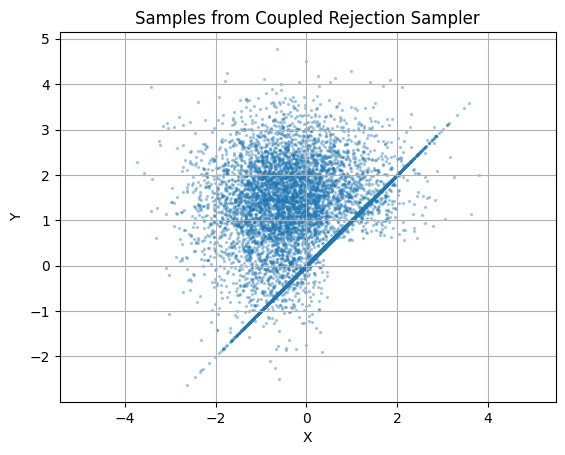

In [8]:
samples = [rejection_coupling() for _ in range(10000)]
xs, ys = zip(*samples)

import matplotlib.pyplot as plt
plt.scatter(xs, ys, alpha=0.3, s=2)
plt.title("Samples from Coupled Rejection Sampler")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.show()

(array([  17.,  137.,  520., 1682., 2754., 2769., 1478.,  533.,   98.,
          12.]),
 array([-3.73663674, -2.98295283, -2.22926891, -1.47558499, -0.72190108,
         0.03178284,  0.78546675,  1.53915067,  2.29283458,  3.0465185 ,
         3.80020241]),
 <BarContainer object of 10 artists>)

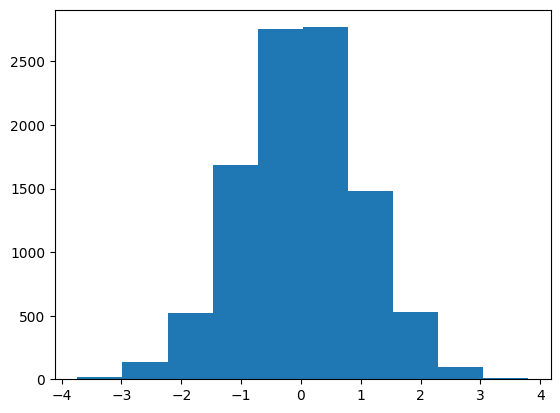

In [9]:
plt.hist(xs)

(array([  12.,  128.,  637., 1735., 2735., 2615., 1542.,  499.,   85.,
          12.]),
 array([-2.62921486, -1.8886568 , -1.14809874, -0.40754067,  0.33301739,
         1.07357545,  1.81413352,  2.55469158,  3.29524964,  4.03580771,
         4.77636577]),
 <BarContainer object of 10 artists>)

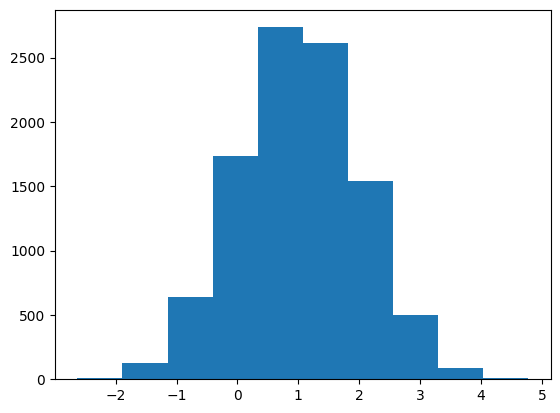

In [10]:
plt.hist(ys)